In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

# About Me

Sheng (Matthew) Lin:
* Joined Baruch Community in July, 2016, with a Bachelor degree in Financial Mathematics. 
* Worked as an Qunatitative Reserach at QuantPort, Jefferies for about two and half years. 
* Daily job is to generate alpha signals using various data set in equity market. 
* Will join Schonfeld Next week.

# Schedule:

* One and half and hour to go through basic pandas functionalities.
* Half an hour for of a small project, which is replicating a graph in a paper
* Q & A s
* Please free to interrupt me when you have questions
* I will try to ask some questions to make the class more interactive. 

# History and Relationship with Numpy

From WikiPedia:

The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.[3] 

Developer Wes McKinney started working on pandas in 2008 while at AQR Capital Management out of the need for a high performance, flexible tool to perform quantitative analysis on financial data. Before leaving AQR he was able to convince management to allow him to open source the library.


This is a package designed for processing financial data, specifically time Series.

Recommand book:

Python for Data Analysis:

![alt text](python.jpg)

Why not Python for finance?

As you could see letter, Pandas was built on numpy.  Some functions could be used interchangable.

# Series and DataFrame

## Series

In [513]:
## create an seires without index
obj = pd.Series([1, 2, 3, 4])
obj

0    1
1    2
2    3
3    4
dtype: int64

In [516]:
## compared to np.array
array = np.array([1, 2, 3, 4])
array

array([1, 2, 3, 4])

In [517]:
obj.values

array([1, 2, 3, 4])

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

If you are familar with R, a way to think about relationship between pandas and numpy are like matrix and Data.Frame.

In [518]:
## series with index
obj2 = pd.Series([1, 2, 3, 4], index = ["c", "d", "e", "f"])

In [519]:
obj2

c    1
d    2
e    3
f    4
dtype: int64

In [291]:
obj2["c"]

1

In [521]:
obj2["d"] = 6

In [522]:
obj2[["c", "f", "e"]]

c    1
f    4
e    3
dtype: int64

One way to think about series is "sorted dictionary". Index can change the order of return series.

In [526]:
## bollean mask
obj2[obj2 >  2]

d    6
e    3
f    4
dtype: int64

In [527]:
obj2 > 2

c    False
d     True
e     True
f     True
dtype: bool

In [529]:
obj2[(obj2 > 2).values]

d    6
e    3
f    4
dtype: int64

In [530]:
obj2

c    1
d    6
e    3
f    4
dtype: int64

In [532]:
obj2["c":"f"]

c    1
d    6
e    3
f    4
dtype: int64

In [13]:
## numerical function
np.exp(obj2)

c      2.718282
d    403.428793
e     20.085537
f     54.598150
dtype: float64

In [535]:
## build sereis from dictionary
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)

In [536]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [537]:
## override index
states = ["California", "Ohio", "Oregon", "Texas"]

In [538]:
obj4 = pd.Series(sdata, index = states)

In [539]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Note that Utah is excluded, and California has some nans.

In [540]:
## don't do this
obj4 == np.nan

California    False
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [306]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [21]:
## alignment of index, this could be dangerous
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [543]:
## watch out if you lose track of index
obj3.reset_index(drop = True) + obj3

0        NaN
1        NaN
2        NaN
3        NaN
Ohio     NaN
Oregon   NaN
Texas    NaN
Utah     NaN
dtype: float64

In [545]:
## change names
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

This seems to be not so useful if you only have one Series. It would be more useful if we have a dataframe.

In [547]:
obj

0    1
1    2
2    3
3    4
dtype: int64

In [548]:
obj.index = ["A", "B", "C", "D"]

In [549]:
obj

A    1
B    2
C    3
D    4
dtype: int64

In [317]:
## of course can apply some aritmematic funciton
obj.mean()

2.5

In [550]:
obj.max()

4

Let's continue to dataframe. Datafrmae could be considered as an ordered dictionary of Series. Even though it seems to be two dimensional, with multilevel index, it can be used to stored high-dimensional data.

## DataFrame

In [552]:
## generate datafrmae from dictionary

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [554]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [555]:
## first few crows
frame.head()  ## like head(data) in R, pandas is an OOP library

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [556]:
## arrange order for columns
pd.DataFrame(data, columns = ["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [557]:
frame2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'],
index=['one', 'two', 'three', 'four','five', 'six'])

In [558]:
## additional columns
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [559]:
## assin series with index
val = pd.Series([- 1.2, - 1.5, - 1.7], index = ["two", "four", "five"])

In [560]:
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [563]:
frame2["debt"] = val

In [564]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [567]:
## withou index
val = pd.Series([- 1.2, - 1.5, - 1.7])
frame2["debt"] = val

In [568]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [569]:
## not using series
val  = [-1.2, -1.5, -1.7] 
frame2["debt"] = val

ValueError: Length of values (3) does not match length of index (6)

As We see, Sereis have some dictionary-like functionality.

In [571]:
## creating new column
frame2["eastern"] = frame2.state == "Ohio"
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [572]:
frame2.eastern  ## also work

one       True
two       True
three     True
four     False
five     False
six      False
Name: eastern, dtype: bool

In [573]:
## warnings
frame.west = frame2.state != "Ohio"

/Users/slin/miniconda3/envs/kenkyu/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [574]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [575]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [576]:
test_col = frame2["state"]

In [577]:
test_col["one"] = "New York"  ##intend to creat a copy

/Users/slin/miniconda3/envs/kenkyu/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [580]:
## this is equialvent to, chain operation is not recommended
frame2["state"]["one"]

'New York'

In [581]:
## no warnings
frame2.loc["one", "state"] = "Ohio"

Recommand to read: 

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

The issue here is depending on your slicing scheme of pandas, it may return a view or a copy. When you try to assign value to a view, it also modifies the origional data. Try to avoid chain assignment as you can

In [583]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [584]:
test_col = frame2["state"].copy()
test_col["one"] = "New York"

In [585]:
test_col

one      New York
two          Ohio
three        Ohio
four       Nevada
five       Nevada
six        Nevada
Name: state, dtype: object

In [586]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [345]:
## nested keys, outter as column name, inner as index
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [587]:
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [346]:
frame3 = pd.DataFrame(pop)

In [347]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [348]:
## transpose 
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [349]:
frame3.index.name = "year"

In [350]:
frame3.columns.name = "state"

In [588]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [589]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [590]:
## accomodate all values
frame2.values

array([[2000, 'Ohio', 1.5, nan, True],
       [2001, 'Ohio', 1.7, nan, True],
       [2002, 'Ohio', 3.6, nan, True],
       [2001, 'Nevada', 2.4, nan, False],
       [2002, 'Nevada', 2.9, nan, False],
       [2003, 'Nevada', 3.2, nan, False]], dtype=object)

## Index object

In [592]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index

In [593]:
index

Index(['a', 'b', 'c'], dtype='object')

In [595]:
index[1:]

Index(['b', 'c'], dtype='object')

In [596]:
index[1] = "d"

TypeError: Index does not support mutable operations

In [597]:
## can have duplicated index
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [598]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [599]:
"foo" in dup_labels

True

Index is immutable, safer to share between objects

## Essential functionalities

In [600]:
## reindexing
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [601]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [602]:
## directly reset index
obj.reset_index()

,index,0
0,d,4.5
1,b,7.2
2,a,-5.3
3,c,3.6


In [603]:
obj.reset_index(drop = True)

0    4.5
1    7.2
2   -5.3
3    3.6
dtype: float64

In [72]:
## reindexing to a new sereis
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [605]:
obj[['a', 'b', 'c', 'd', 'e']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['e'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

Reindex avoid modifying index in-place.

In [606]:
## this is very useful for timeseries data. 
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[1, 2, 4])

In [607]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [614]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=["a", "d", "f"])

In [615]:
obj3

a      blue
d    purple
f    yellow
dtype: object

In [616]:
obj3.reindex(index = ["a", "z", "b", "d", "e"])

a      blue
z       NaN
b       NaN
d    purple
e       NaN
dtype: object

In [617]:
obj3.reindex(index = ["a", "z", "b", "d", "e"], method = "ffill")

a      blue
z    yellow
b      blue
d    purple
e    purple
dtype: object

In [378]:
obj3.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [379]:
obj3.reindex(range(6), method = "ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [618]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
 index=['a', 'c', 'd'],
columns=['Ohio', 'Texas', 'California'])

In [619]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [620]:
frame2 = frame.reindex(["a", "b", "c", "d"])

In [621]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [622]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Again, the advantage is to modify the indices to generate a new frame.

### Drop Entries

In [636]:
obj = pd.Series(np.arange(5.), index = ["a", "b", "c", "d", "e"])

In [627]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [630]:
obj

a    0.0
b    1.0
e    4.0
dtype: float64

In [628]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [631]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
 index=['Ohio', 'Colorado', 'Utah', 'New York'],
  columns=['one', 'two', 'three', 'four'])

In [632]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [633]:
data.drop(["Colorado", "Ohio"])   ##drop

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [634]:
data.drop("two", axis = 1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [637]:
## inplace drop
obj.drop("c", inplace = True)

In [638]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

Note that most of case, pandas function would return a new copy of origional object. However, we can change the parameter inplace to indicate whether we want the modification be done in place. We should be extremely careful to use inplace within functions.

## Index slicing and filtering

In [639]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [640]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [641]:
obj["b"]

1.0

In [642]:
obj[1]

1.0

In [643]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [644]:
obj[["b", "a", "d"]]

b    1.0
a    0.0
d    3.0
dtype: float64

In [645]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [646]:
obj[obj < 3]

a    0.0
b    1.0
c    2.0
dtype: float64

In [96]:
obj["b":"c"] ## the end is inclusive

b    1.0
c    2.0
dtype: float64

In [648]:
obj_t = pd.Series(np.arange(4.), index=['d', 'c', 'b', 'a'])

In [649]:
obj_t["d":"b"]  ## inclusive

d    0.0
c    1.0
b    2.0
dtype: float64

In [650]:
## setting values
obj["b":"c"] = 5

In [651]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

We see that pandas is smart, we can use index slicing and numeric slicing interchangeably.

In [652]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
 index=['Ohio', 'Colorado', 'Utah', 'New York'],
columns=['one', 'two', 'three', 'four'])

In [653]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [654]:
data["two"]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [655]:
data[["two"]]

,two
Ohio,1
Colorado,5
Utah,9
New York,13


In [656]:
data[["three", "one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [657]:
## sepcial case indexing
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [658]:
## boolean seleciton
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [659]:
data[data < 5]

,one,two,three,four
Ohio,0.0,1.0,2.0,3.0
Colorado,4.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN


### selection with loc and iloc 

Using loc and iloc are recommended to avoid chained selection.

In [663]:
## select using index/ columnname
data.loc["Colorado", ["two", "three"]]

two      5
three    6
Name: Colorado, dtype: int64

In [664]:
## select using index
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [665]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [110]:
data.three > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [420]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [421]:
data.three > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [666]:
## combing index and slicing, selection base on a column. ## select rows based on column conditions
data.iloc[:, :3]

,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [111]:
## combing index and slicing, selection base on a column. ## select rows based on column conditions
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


If you see some code with ix operation, note that even though it is supported, but it is considered to be deprecated and is not recommended.

### Integer Indexes

This part is a little tricky

In [667]:
ser = pd.Series(np.arange(3.))

In [668]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [669]:
ser[-1]

KeyError: -1

It is hard for pandas to check whether we want to do label-based or position based.

In [670]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [671]:
ser2[-1]

2.0

The solution is when you have integer index slicing, try to use loc/ iloc. This is common, since many data set you are dealing with may not have index, so they default to have integer index.

In [427]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [428]:
ser.iloc[:1]

0    0.0
dtype: float64

## Arithmetic and Data Alignment

In [672]:
## series alignment
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [673]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [674]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [432]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [675]:
## similar to data frame
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [676]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [677]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan ## again, don'e do df["b"][1]

In [678]:
## add and fill na
df1.add(df2, fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [679]:
## reindexing with filling values
df1.reindex(columns = df2.columns, fill_value = 0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [680]:
## would cause erros, since some column does not exist
df1[df2.columns]

KeyError: "['e'] not in index"

## Operation between Series and DataFrame

This can be viewed as braodcasting in numpy.

In [681]:
arr = np.arange(12.).reshape((3, 4))

In [682]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [683]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [684]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
  columns=list('bde'),
    index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [685]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [686]:
series = frame.iloc[0]

In [687]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [688]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


We see that the substraction is brodcasted to every row.

In [690]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [691]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


If some index doese not match. then Nan would be generated.

In [692]:
series3 = frame["d"]

In [693]:
frame.sub(series3, axis = "index")

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [696]:
frame.div(series3, axis = "index")

,b,d,e
Utah,0.000000,1.0,2.000000
Ohio,0.750000,1.0,1.250000
Texas,0.857143,1.0,1.142857
Oregon,0.900000,1.0,1.100000


In [695]:
frame.div(series2, axis = "index")

,b,d,e
Ohio,NaN,NaN,NaN
Oregon,NaN,NaN,NaN
Texas,NaN,NaN,NaN
Utah,NaN,NaN,NaN
b,NaN,NaN,NaN
e,NaN,NaN,NaN
f,NaN,NaN,NaN


Substraction is done in column, we can also do some operation like multiplication, division e.t.a.l.

### Function Application and mapping

In [697]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
 index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [698]:
frame

,b,d,e
Utah,1.004923,-0.420581,-0.911457
Ohio,1.378345,0.638881,-0.880889
Texas,1.601834,1.127914,-0.403196
Oregon,1.041733,-0.010432,-2.018673


In [700]:
f = lambda x: x.max() - x.min()

In [701]:
frame.apply(f)  ## default to each row 

b    0.596911
d    1.548495
e    1.615477
dtype: float64

In [702]:
frame.apply(f, axis = "columns")

Utah      1.916380
Ohio      2.259234
Texas     2.005030
Oregon    3.060406
dtype: float64

This is just a simple syntax and avoid writing loop. Essentially, it is still an loop. Note that this is not a vectorized implementation. During data processing, a lot of easy work can be done using simple function, i.e. max, min, mean, e.t.a.l. This can be easily be implemented using lambda function.

In [460]:
def f(x):
    return pd.Series([x.min(), x.max()], index = ["min", "max"])

In [461]:
## return a series
frame.apply(f)

,b,d,e
min,-1.620175,-0.277919,-1.181856
max,2.611402,1.332335,1.635010


In [703]:
## apply to each element
format_f  = lambda x: '%.2f' % x

In [704]:
frame.applymap(format_f)

,b,d,e
Utah,1.00,-0.42,-0.91
Ohio,1.38,0.64,-0.88
Texas,1.60,1.13,-0.40
Oregon,1.04,-0.01,-2.02


In [149]:
frame["e"].map(format_f)

Utah       1.34
Ohio      -0.72
Texas     -0.27
Oregon    -0.17
Name: e, dtype: object

## Sorting and Ranking

In [705]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [706]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [707]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [708]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
index=['three', 'one'],
columns=['d', 'a', 'b', 'c'])

In [709]:
## data frame version
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [710]:
frame.sort_index(axis = 1, ascending = False)  ## not ascending

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [711]:
obj = pd.Series([4, 7, -3, 2])

In [712]:
## sort values
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [713]:
 obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [714]:
## nan value would be last
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [715]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [716]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [717]:
frame.sort_values(by = ["a", "b"])  ## sort on both

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [718]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [719]:
## geting rankd
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Note there are decimal numbers, because we take average of ranks if their ranks are the same.

In [164]:
obj.rank(method = "first")  ## the first one get higher rank

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [165]:
obj.rank(ascending = False, method = "max")  ## using the maximum rank within group

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [720]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 
                            2], 'a': [0, 1, 0, 1],
 'c': [-2, 5, 8, -2.5]})

In [721]:
## get ranks with columns
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


## Duplicated lables

Note this is often very common when data have duplicated indices. Can anyone think of Why?

In [722]:
obj = pd.Series(range(5), index = ["a", "a", "b", "b", "c"])

In [723]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [724]:
## if index is unique
obj.index.is_unique

False

In [725]:
obj["a"]

a    0
a    1
dtype: int64

## Summery statistics

In [726]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
[np.nan, np.nan], [0.75, -1.3]],
index=['a', 'b', 'c', 'd'],
columns=['one', 'two'])

In [727]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [728]:
## sum rows
df.sum()

one    9.25
two   -5.80
dtype: float64

In [729]:
## differnt index
df.sum(axis = "columns")

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [730]:
df.mean(axis = "columns", skipna = False)  ## will leave nan

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [731]:
## get the max id
df.idxmax()

one    b
two    d
dtype: object

In [732]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [733]:
## commonly used when in EDA
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Many other simple statistical functions as well, i.e.: skew/ std, kurt, e.t.a.l.

In [734]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [735]:
uniques = obj.unique()

In [736]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [737]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [183]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [184]:
## check occurance
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [738]:
mask = obj.isin(["b", "c"])

In [739]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [187]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [188]:
to_match = pd.Series(["c", "a", "b", "b", "c", "a"])

In [189]:
unique_vals = pd.Series(["c", "b", "a"])

In [190]:
## get the index of series
pd.Index(unique_vals).get_indexer(to_match) ## index of non distinc values

array([0, 2, 1, 1, 0, 2])

In [191]:
## count values of a dataframe
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
'Qu2': [2, 3, 1, 2, 3],
'Qu3': [1, 5, 2, 4, 4]})

In [192]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [193]:
result = data.apply(pd.value_counts)  ## connecting series

In [194]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


# Time Series

## Built-in datatime

In [741]:
## datatime objects
from datetime import datetime, date, time

In [742]:
dt = datetime(2011, 10, 29, 20, 30, 21)

In [743]:
dt

datetime.datetime(2011, 10, 29, 20, 30, 21)

In [744]:
dt.day

29

In [745]:
dt.minute

30

In [746]:
dt.date()

datetime.date(2011, 10, 29)

In [200]:
dt.strftime("%m/%d/%Y %H:%M")  ## convert time to string

'10/29/2011 20:30'

In [201]:
datetime.strptime("20091031", "%Y%m%d") ##convert string to time

datetime.datetime(2009, 10, 31, 0, 0)

In [747]:
dt.replace(minute = 0, second = 0)

datetime.datetime(2011, 10, 29, 20, 0)

In [748]:
dt2 = datetime(2011, 11, 15, 22, 30)

In [749]:
delta = dt2 - dt

In [750]:
delta

datetime.timedelta(days=17, seconds=7179)

In [751]:
delta.days  ## extract days

17

In [207]:
dt + delta

datetime.datetime(2011, 11, 15, 22, 30)

In [764]:
import datetime
import pytz


def convert_datetime_timezone(dt, tz1, tz2):
    tz1 = pytz.timezone(tz1)
    tz2 = pytz.timezone(tz2)

    dt = datetime.datetime.strptime(dt,"%Y-%m-%d %H:%M:%S")
    dt = tz1.localize(dt)
    dt = dt.astimezone(tz2)
    dt = dt.strftime("%Y-%m-%d %H:%M:%S")

    return dt

In [765]:
dt = "2017-05-13 14:56:32"
tz1 = "Europe/Berlin"
tz2 = "UTC"

In [766]:
tz1 = pytz.timezone(tz1)
tz2 = pytz.timezone(tz2)

dt = datetime.datetime.strptime(dt,"%Y-%m-%d %H:%M:%S")

In [767]:
dt

datetime.datetime(2017, 5, 13, 14, 56, 32)

In [768]:
dt = tz1.localize(dt)

In [769]:
dt

datetime.datetime(2017, 5, 13, 14, 56, 32, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [770]:
dt = dt.astimezone(tz2)

In [771]:
dt

datetime.datetime(2017, 5, 13, 12, 56, 32, tzinfo=<UTC>)

In [772]:
dt = dt.strftime("%Y-%m-%d %H:%M:%S")

In [773]:
dt

'2017-05-13 12:56:32'

In [762]:
convert_datetime_timezone("2017-05-13 14:56:32", "Europe/Berlin", "UTC")


'2017-05-13 12:56:32'

What kinds of data may need this operation?

In [774]:
## datetime index
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
 datetime(2011, 1, 7), datetime(2011, 1, 8),
 datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [775]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [776]:
ts = pd.Series(np.random.randn(6), index=dates)

In [778]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

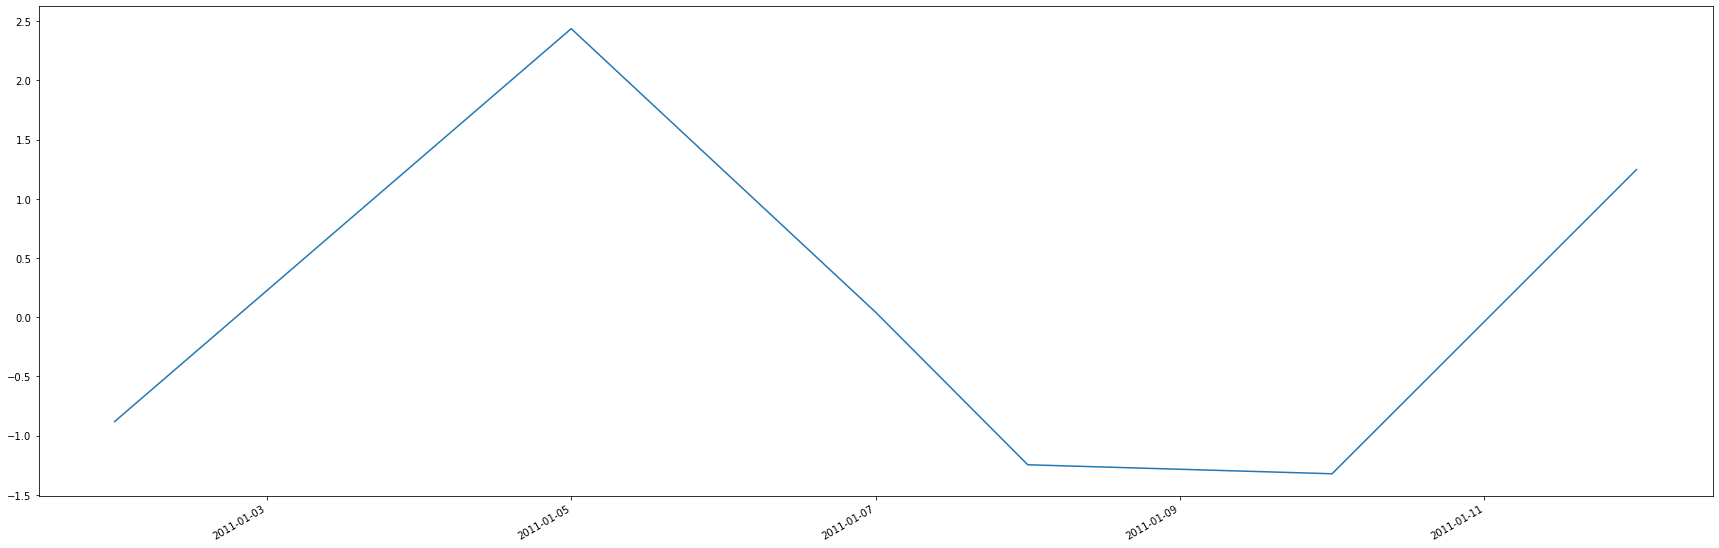

In [779]:
import matplotlib.pyplot as plt
ts.plot()

In [780]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [781]:
ts.index.values

array(['2011-01-02T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-07T00:00:00.000000000', '2011-01-08T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

Note they are the same thing.

In [782]:
ts.index.values[0]

numpy.datetime64('2011-01-02T00:00:00.000000000')

During our example, we would take a closer look into it.

In [783]:
## periods v.s timestamps
rng = pd.date_range('2000-01-01', periods=3, freq='M')

ts = pd.Series(np.random.randn(3), index=rng)

ts

2000-01-31    0.578555
2000-02-29    1.466896
2000-03-31    1.280948
Freq: M, dtype: float64

In [786]:
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [787]:
pts = ts.to_period()

In [788]:
pts

2000-01    0.578555
2000-02    1.466896
2000-03    1.280948
Freq: M, dtype: float64

In [789]:
pts.index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]', freq='M')

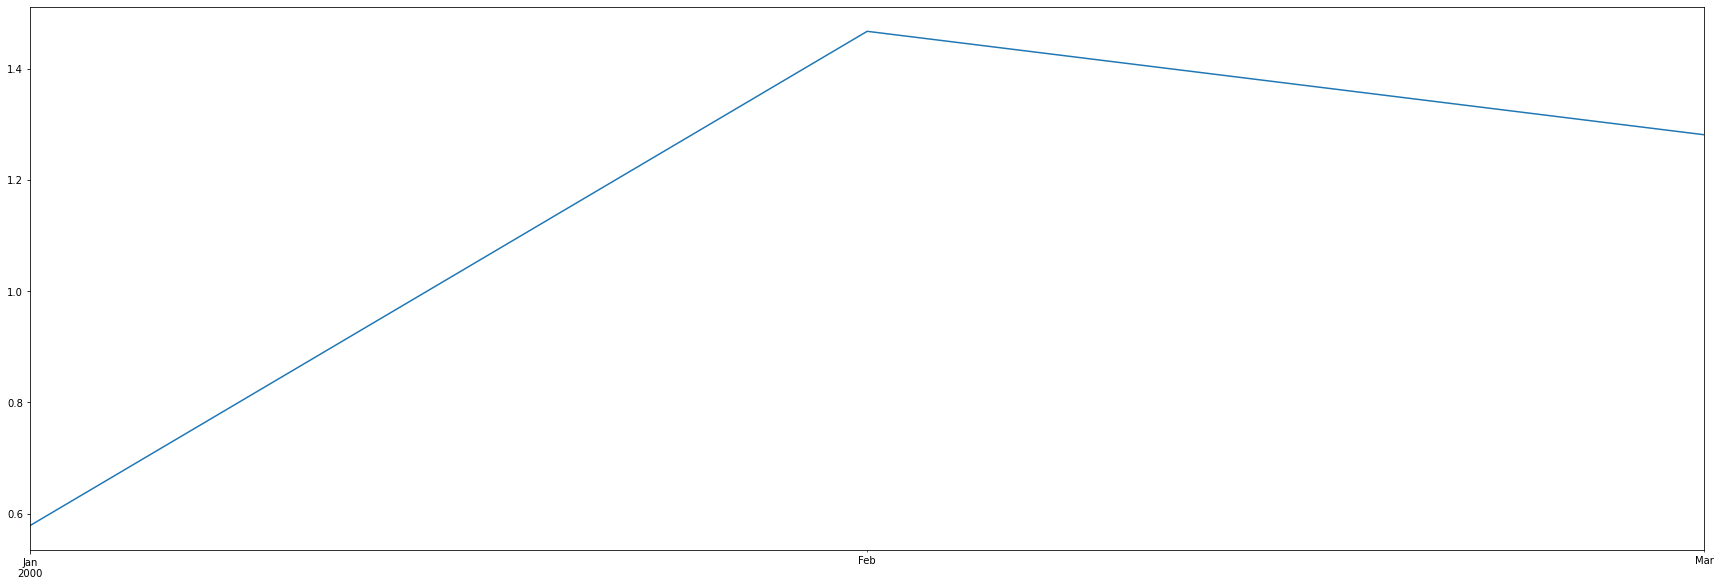

In [790]:
pts.plot()

Montnly data.

In [791]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [792]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [793]:
ts2

2000-01-29   -0.016079
2000-01-30   -0.956600
2000-01-31   -1.557545
2000-02-01    1.303748
2000-02-02    1.032083
2000-02-03   -0.062694
Freq: D, dtype: float64

In [794]:
ts2.to_period("M")

2000-01   -0.016079
2000-01   -0.956600
2000-01   -1.557545
2000-02    1.303748
2000-02    1.032083
2000-02   -0.062694
Freq: M, dtype: float64

In [795]:
## periods
pts = ts2.to_period()

In [796]:
pts

2000-01-29   -0.016079
2000-01-30   -0.956600
2000-01-31   -1.557545
2000-02-01    1.303748
2000-02-02    1.032083
2000-02-03   -0.062694
Freq: D, dtype: float64

In [797]:
pts.to_timestamp(how = "end")  ## convert to time stamp

2000-01-29 23:59:59.999999999   -0.016079
2000-01-30 23:59:59.999999999   -0.956600
2000-01-31 23:59:59.999999999   -1.557545
2000-02-01 23:59:59.999999999    1.303748
2000-02-02 23:59:59.999999999    1.032083
2000-02-03 23:59:59.999999999   -0.062694
Freq: D, dtype: float64

In [798]:
pts.to_timestamp(how = "begin")  ## convert to time stamp

2000-01-29   -0.016079
2000-01-30   -0.956600
2000-01-31   -1.557545
2000-02-01    1.303748
2000-02-02    1.032083
2000-02-03   -0.062694
Freq: D, dtype: float64

In [799]:
pts.to_timestamp(how = "end").index

DatetimeIndex(['2000-01-29 23:59:59.999999999',
               '2000-01-30 23:59:59.999999999',
               '2000-01-31 23:59:59.999999999',
               '2000-02-01 23:59:59.999999999',
               '2000-02-02 23:59:59.999999999',
               '2000-02-03 23:59:59.999999999'],
              dtype='datetime64[ns]', freq='D')

In [800]:
## resmapling
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.034632
2000-01-02    1.503840
2000-01-03    0.945733
2000-01-04   -1.154739
2000-01-05   -0.070944
                ...   
2000-04-05    0.250648
2000-04-06   -0.224431
2000-04-07   -0.535361
2000-04-08    1.271065
2000-04-09   -0.825001
Freq: D, Length: 100, dtype: float64

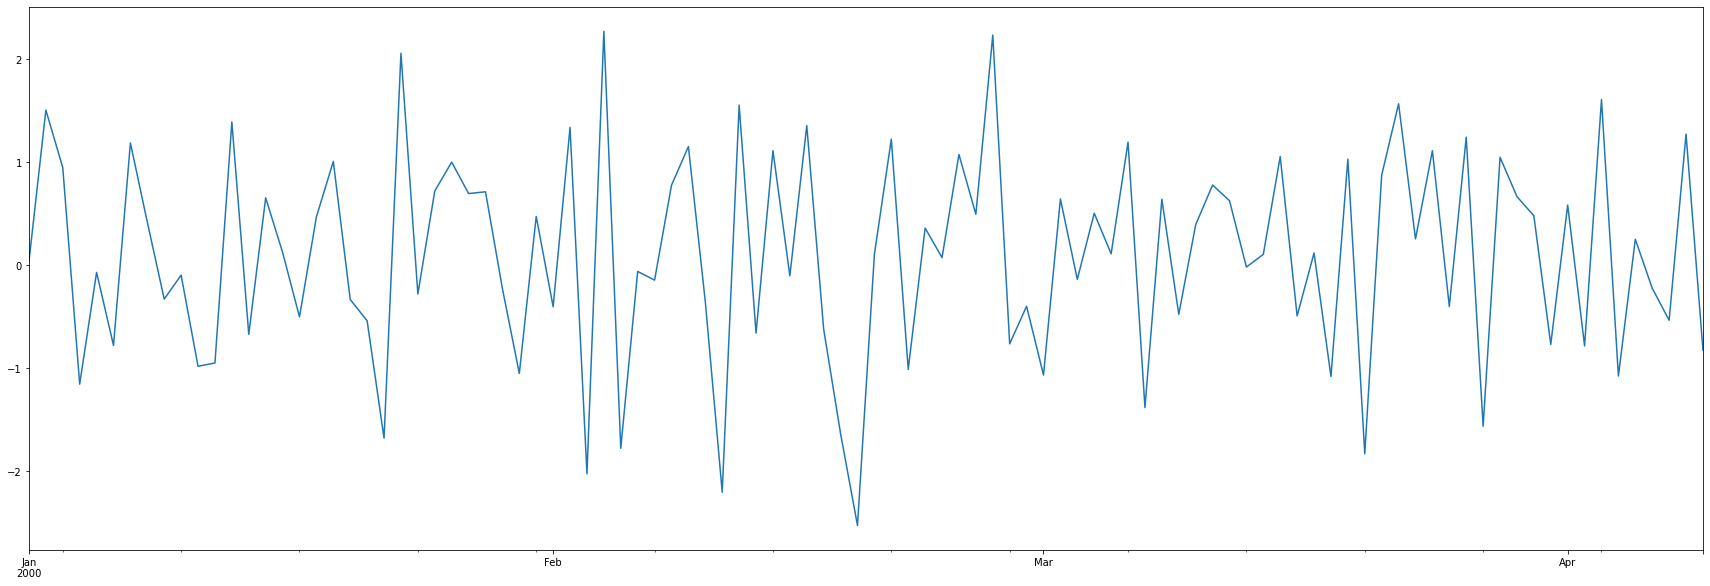

In [801]:
ts.plot()

In [802]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [804]:
ts.resample("M")

In [805]:
ts.resample("M").max()

2000-01-31    2.054647
2000-02-29    2.267871
2000-03-31    1.564969
2000-04-30    1.606237
Freq: M, dtype: float64

In [503]:
ts.resample("M").mean()

2000-01-31    0.047787
2000-02-29   -0.129373
2000-03-31   -0.228336
2000-04-30   -0.362797
Freq: M, dtype: float64

# Merging/ Conecting DataFrame

Merge: SQL join like operations

In [230]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})

In [231]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [232]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [233]:
pd.merge(df1 ,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [234]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [235]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
 'data2': range(3)})
## merge on differt keys

pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [236]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [237]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Left, right join is also possible. Multiple keys are also possible.

Concanate: stack dataframes/ series together.

In [806]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [807]:
s1

a    0
b    1
dtype: int64

In [808]:
s2

c    2
d    3
e    4
dtype: int64

In [809]:
s3

f    5
g    6
dtype: int64

In [810]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [811]:
pd.concat([s1, s2, s3], axis=1)  ## like ouhter join

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [812]:
s4 = pd.concat([s1, s3])

In [815]:
s1

a    0
b    1
dtype: int64

In [814]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [813]:
pd.concat([s1, s4], axis = 1,  join ="inner") ##inner join

,0,1
a,0,0
b,1,1


In [505]:
## pivogting
data = pd.read_csv('macrodata.csv')

In [506]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [507]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name = "date")

In [508]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [509]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [510]:
columns

Index(['realgdp', 'infl', 'unemp'], dtype='object', name='item')

In [511]:
data = data.reindex(columns=columns)

In [512]:
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [255]:
data.index = periods.to_timestamp('D', 'end')

In [256]:
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [257]:
data.stack()

date                           item   
1959-03-31 23:59:59.999999999  realgdp     2710.349
                               infl           0.000
                               unemp          5.800
1959-06-30 23:59:59.999999999  realgdp     2778.801
                               infl           2.340
                                            ...    
2009-06-30 23:59:59.999999999  infl           3.370
                               unemp          9.200
2009-09-30 23:59:59.999999999  realgdp    12990.341
                               infl           3.560
                               unemp          9.600
Length: 609, dtype: float64

In [258]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [259]:
ldata.head()

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [260]:
pivoted = ldata.pivot('date', 'item', 'value')

In [261]:
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


Wide table. This kind of pitovted table is more useful for machine learning purpose.

# Groupby

In [816]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})

In [817]:
df

,key1,key2,data1,data2
0,a,one,0.033055,0.375699
1,a,two,0.117739,0.928156
2,b,one,-0.748848,-0.402185
3,b,two,-0.987337,-2.167517
4,a,one,-0.047540,0.882745


In [818]:
grouped = df["data1"].groupby(df["key1"])

In [819]:
grouped

In [820]:
grouped.mean()

key1
a    0.034418
b   -0.868093
Name: data1, dtype: float64

In [821]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [824]:
means

key1  key2
a     one    -0.007243
      two     0.117739
b     one    -0.748848
      two    -0.987337
Name: data1, dtype: float64

In [268]:
means.unstack()

key2,one,two
key1,,
a,0.220955,0.124608
b,0.455761,-0.430173


# Ploting

I think the learning curve is as followed:
* using plt.plot
* try to aggregate all data in a dataframe and use pandas built-in plot function
* study ax, and figure

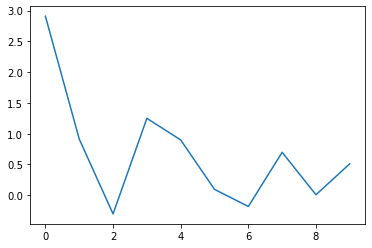

In [269]:
plt.plot(np.random.normal(size = 10))

In [825]:
df = pd.DataFrame(np.random.normal(size = (5,3)))

In [826]:
df

,0,1,2
0,-0.363881,-0.177752,1.979629
1,0.428809,-1.129012,-0.609572
2,0.112985,0.860905,-0.830586
3,1.330178,-1.194492,1.159661
4,-2.016569,-0.156030,0.274237


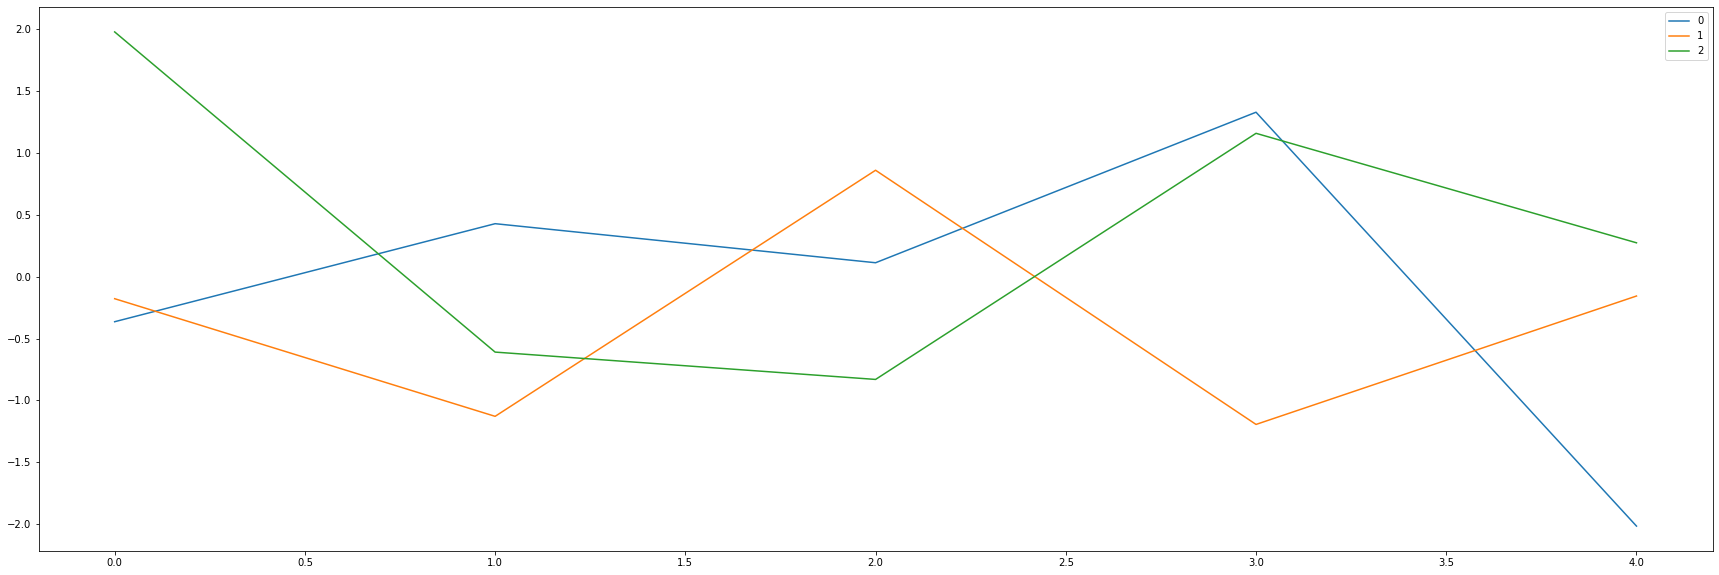

In [827]:
df.plot()

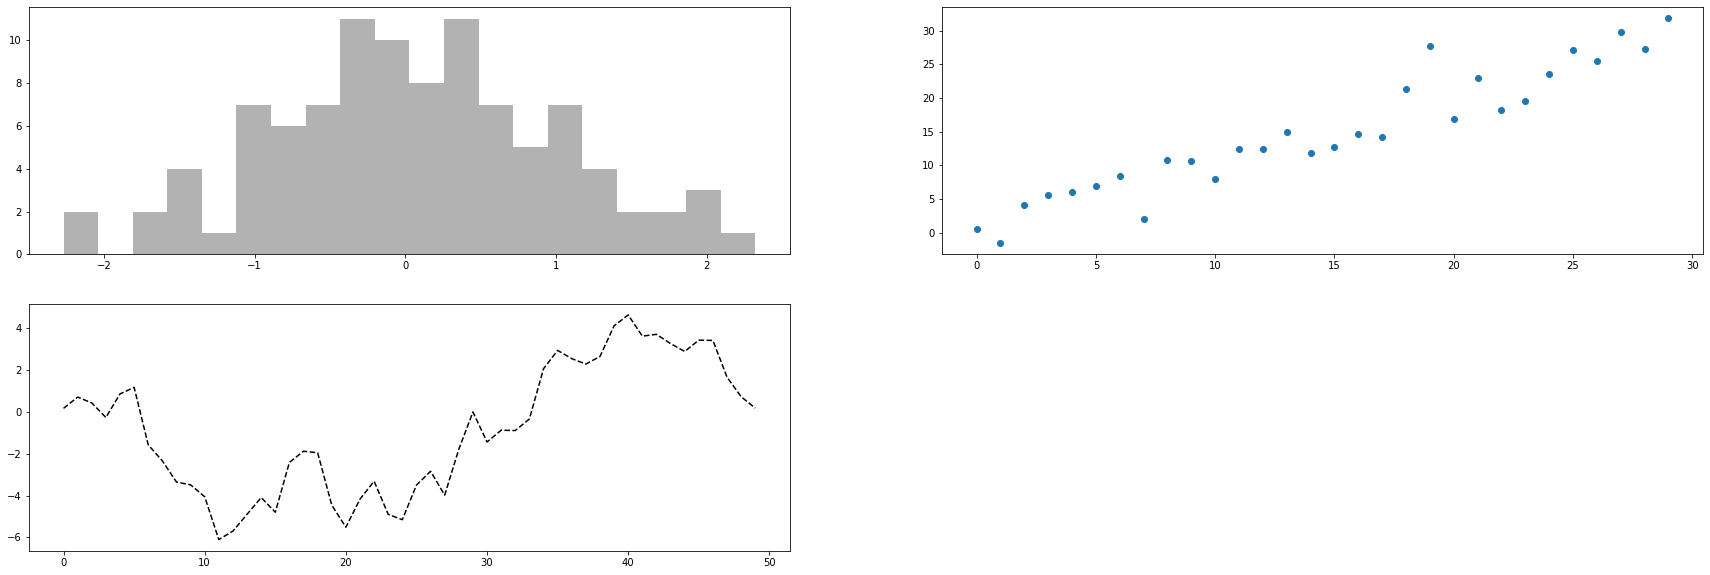

In [273]:
## subplots
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

# Numpy v.s Pandas

## Production Issues

# Conclusion

* when you start doing reserach, use pandas first. 
* When efficiency is needed, switch to numpy. 